In [1]:
# load Wine Dataset
from sklearn.datasets import load_wine
from sklearn.neighbors import  KNeighborsClassifier
import numpy as np
winedata = load_wine()
feature_names = winedata.feature_names

In [2]:
# Select features using LASSO
from sklearn.linear_model import LassoCV
data_x = winedata.data
data_y = winedata.target
Lasso_algo = LassoCV().fit(data_x, data_y)
shrinking = np.abs(Lasso_algo.coef_)
features_index = (-shrinking).argsort()[:2]
# Data with two features
data_x = data_x [:,features_index ]

In [3]:
from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans


gmm_clf = GaussianMixture(n_components=3,covariance_type='full')
gmm_clf.fit(data_x)
feature_1 = data_x[:,0] # flavanoids
feature_2 = data_x[:,1] # color_intensity
label = gmm_clf.predict(data_x)


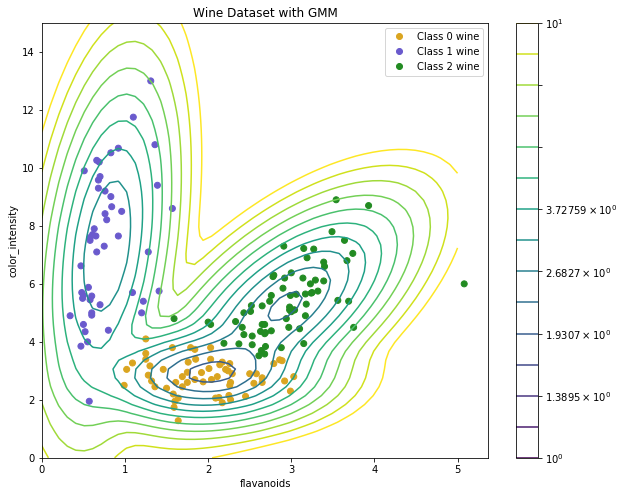

In [6]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.figure(figsize=(10,8))
classes = ['Class 0 wine', 'Class 1 wine', 'Class 2 wine']
colors = [ 'goldenrod', 'slateblue','forestgreen']

x = np.linspace(0., 5.)
y = np.linspace(0., 15.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm_clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm( ),
                 levels=np.logspace(0,1, 15))
CB = plt.colorbar(CS, shrink=1, extend='both')
scatter = plt.scatter(feature_1, feature_2, c= label, cmap = mcolors.ListedColormap(colors))

plt.xlabel("flavanoids")
plt.ylabel("color_intensity")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('Wine Dataset with GMM')
#plt.savefig('Wine_data_GMM.png', dpi=72, bbox_inches='tight')
plt.show()